# 서울시 CCTV 현황 데이터 분석

In [1]:
import numpy as np
import pandas as pd

## 1.서울통계서비스 사이트에서 '주민등록인구(구별)' 통계에서 2018년도 데이터를 다운 받아서 '서울시 인구현황.txt' 파일로 저장한다.

## 2. 파일에서 데이터를 읽어 컬럼이 '자치구', '인구수', '내국인', '외국인', '고령자' 인 데이터 프레임을 만든다.(pop)


In [2]:
# 천단위 구분 기호 제외 -> 숫자 
# delimeter , => tap  => \t
# header 행이 여러줄 => 한 줄만 = > skoprows[]
# column = > usecols =[]

In [48]:
pop = pd.read_csv('서울시 인구현황.txt', sep='\t',thousands =',',skiprows = [0,1,2], header = 0,
                 usecols = [1,3,6,9,13], names = ['자치구','인구수','내국인','외국인','고령자'])

pop.head()

,자치구,인구수,내국인,외국인,고령자
0,종로구,163026,153065,9961,26742
1,중구,135633,125725,9908,22005
2,용산구,245090,228999,16091,37640
3,성동구,316463,308221,8242,42767
4,광진구,371063,355559,15504,45619


## 3. 외국인 비율과 고령자 비율을 추가한다.

In [49]:
pop['외국인 비율'] = pop['외국인']/pop['인구수']*100
pop['고령자 비율'] = pop['고령자']/pop['인구수']*100
pop.head()

,자치구,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,163026,153065,9961,26742,6.110068,16.403518
1,중구,135633,125725,9908,22005,7.305007,16.223928
2,용산구,245090,228999,16091,37640,6.565343,15.357624
3,성동구,316463,308221,8242,42767,2.604412,13.514060
4,광진구,371063,355559,15504,45619,4.178266,12.294139


### 4. 서울시 자치구 년도별 CCTV 설치 현황 데이터를 다운 받아서'서울시 자치구 년도별 CCTV 설치 현황.xlsx' 파일로 저장한후, 데이터를 읽서 데이터 프레임을 만든다.(cctv)

In [50]:
cctv = pd.read_excel('서울시 자치구 년도별 CCTV 설치 현황.xlsx')
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


### 5. '기관명' 컬럼 데이터의 빈칸을 없애고, 컬럼명을 '자치구'로 변경한다.

In [6]:
cctv['기관명'].unique()

array(['강 남 구', '강 동 구', '강 북 구', '강 서 구', '관 악 구', '광 진 구', '구 로 구',
       '금 천 구', '노 원 구', '도 봉 구', '동대문구', '동 작 구', '마 포 구', '서대문구',
       '서 초 구', '성 동 구', '성 북 구', '송 파 구', '양 천 구', '영등포구', '용 산 구',
       '은 평 구', '종 로 구', '중     구', '중 랑 구'], dtype=object)

In [51]:
cctv['기관명'] =['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
       '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구',
       '은평구', '종로구', '중구', '중랑구']

#cctv['기관명']=[x.replace(' ','')for x in cctv['기관명'].unique()]
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [52]:
cctv.rename(columns={'기관명':'자치구'},inplace=True)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


### 6. 2015년 이전의 데이터를 합하여 '2015년 이전' 컬럼을 만들고, 최근 3개년간의 데이터를 합하여 '최근 3개년' 컬럼을 만든 후, '최근 증가율' 컬럼을 만든다.

In [53]:
cctv.isna()
cctv.fillna(0).head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [54]:
cctv[['2011년 이전','2012년','2013년']] = \
    cctv[['2011년 이전','2012년','2013년']].fillna(0).astype(int)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944,195,316,430,546,765,577,448
1,강동구,1879,303,387,134,59,144,194,273,385
2,강북구,1265,243,88,141,74,145,254,1,319
3,강서구,1617,219,155,118,230,187,190,264,254
4,관악구,3985,430,56,419,487,609,619,694,671


In [55]:
cctv['2015년 이전'] = cctv[['2011년 이전','2012년','2013년','2014년','2015년']].sum(axis=1)
#ccctv2 = cctv.iloc[:,2:7].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강남구,5221,1944,195,316,430,546,765,577,448,3431
1,강동구,1879,303,387,134,59,144,194,273,385,1027
2,강북구,1265,243,88,141,74,145,254,1,319,691
3,강서구,1617,219,155,118,230,187,190,264,254,909
4,관악구,3985,430,56,419,487,609,619,694,671,2001


In [56]:
cctv['최근 3개년'] = cctv[['2016년','2017년','2018년']].sum(axis=1)
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852
2,강북구,1265,243,88,141,74,145,254,1,319,691,574
3,강서구,1617,219,155,118,230,187,190,264,254,909,708
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984


In [57]:
cctv['최근 증가율'] = cctv['최근 3개년'] / cctv['소계'] * 100
cctv.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전,최근 3개년,최근 증가율
0,강남구,5221,1944,195,316,430,546,765,577,448,3431,1790,34.284620
1,강동구,1879,303,387,134,59,144,194,273,385,1027,852,45.343268
2,강북구,1265,243,88,141,74,145,254,1,319,691,574,45.375494
3,강서구,1617,219,155,118,230,187,190,264,254,909,708,43.784787
4,관악구,3985,430,56,419,487,609,619,694,671,2001,1984,49.786700


In [58]:
cctv.iloc[:,[0,1,10,7,8,9,11,12]].head()
# del cctv['2016년']
# cctv.drop = ['2011년 이전','2012년','2013년','2014년','2015년']

,자치구,소계,2015년 이전,2016년,2017년,2018년,최근 3개년,최근 증가율
0,강남구,5221,3431,765,577,448,1790,34.284620
1,강동구,1879,1027,194,273,385,852,45.343268
2,강북구,1265,691,254,1,319,574,45.375494
3,강서구,1617,909,190,264,254,708,43.784787
4,관악구,3985,2001,619,694,671,1984,49.786700


### 7. '자치구', '소계', '최근 증가율' 컬럼을 제외하고 나머지는 모두 삭제한다.

In [59]:
cctv2=cctv.iloc[:,[0,1,12]]
cctv2.head()

,자치구,소계,최근 증가율
0,강남구,5221,34.284620
1,강동구,1879,45.343268
2,강북구,1265,45.375494
3,강서구,1617,43.784787
4,관악구,3985,49.786700


### 8. 서울시 인구 데이터와 cctv 데이터를 합치고, '자치구'를 index로 만든다.

In [60]:
df = pd.merge(cctv2,pop,on='자치구')
df.head()

,자치구,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,34.284620,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,45.343268,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,45.375494,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,43.784787,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,49.786700,520040,501957,18083,72249,3.477233,13.892970


In [61]:
df.set_index('자치구',inplace=True) # 원본 데이터 변경
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,5221,34.284620,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,45.343268,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,45.375494,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,43.784787,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,49.786700,520040,501957,18083,72249,3.477233,13.892970


### 9. CCTV 현황을 다양한 형태로 시각화하여 보여준다.

In [17]:
#Matplotlib 사용과 한글 처리를 위한 Code
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False  #minus 표시
mpl.rc('font', family='Malgun Gothic')
% matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["font.size"] = 14

UsageError: Line magic function `%` not found.


### 자치구별 CCTV 개수

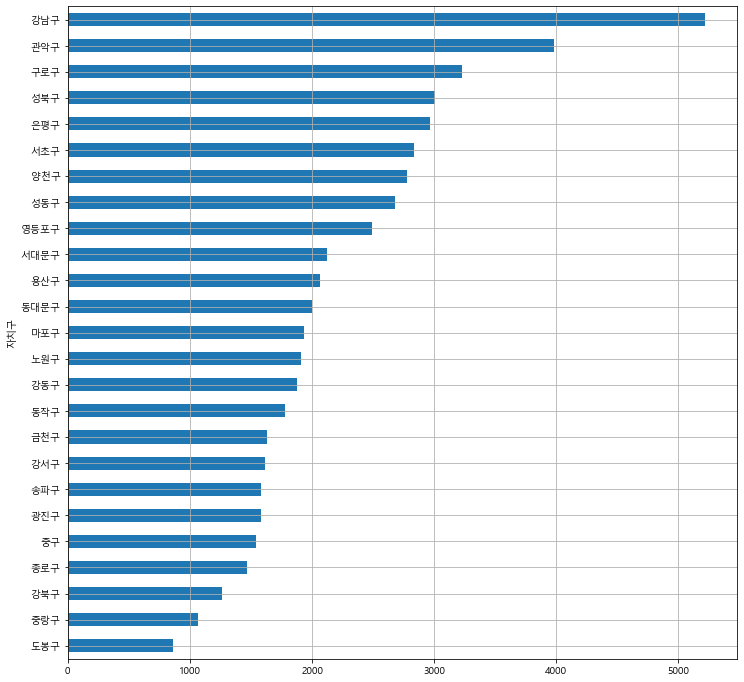

In [23]:
df['소계'].sort_values().plot(kind='barh',grid=True, figsize=(12,12))  # sort_values() 내림차순으로 표현

plt.show()


### 자치구별 인당 CCTV 개수(내림차순으로)

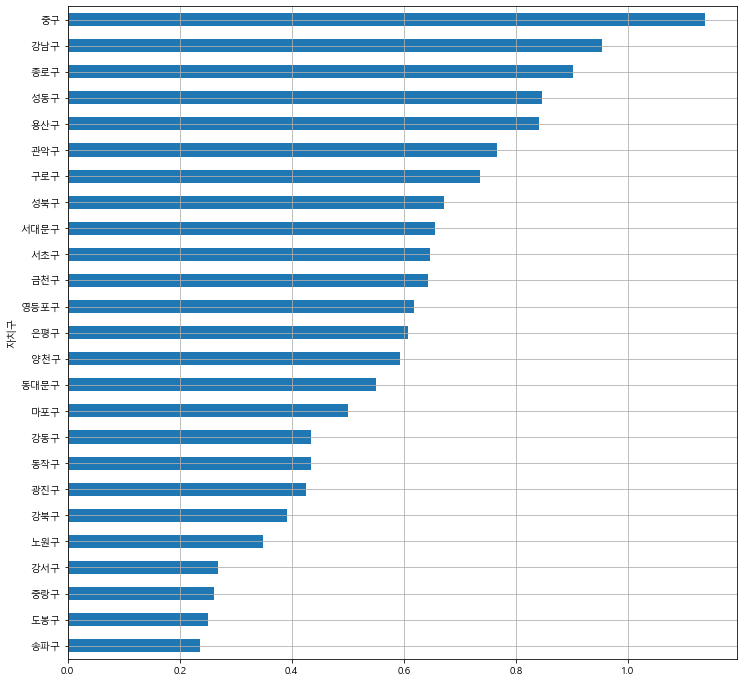

In [75]:
df['인당 CCTV'] = df['소계'] / df['인구수'] * 100
df['인당 CCTV'].sort_values().plot(kind='barh',grid=True, figsize=(12,12))

plt.show()

### 자치구별 최근 증가율(내림차순으로)

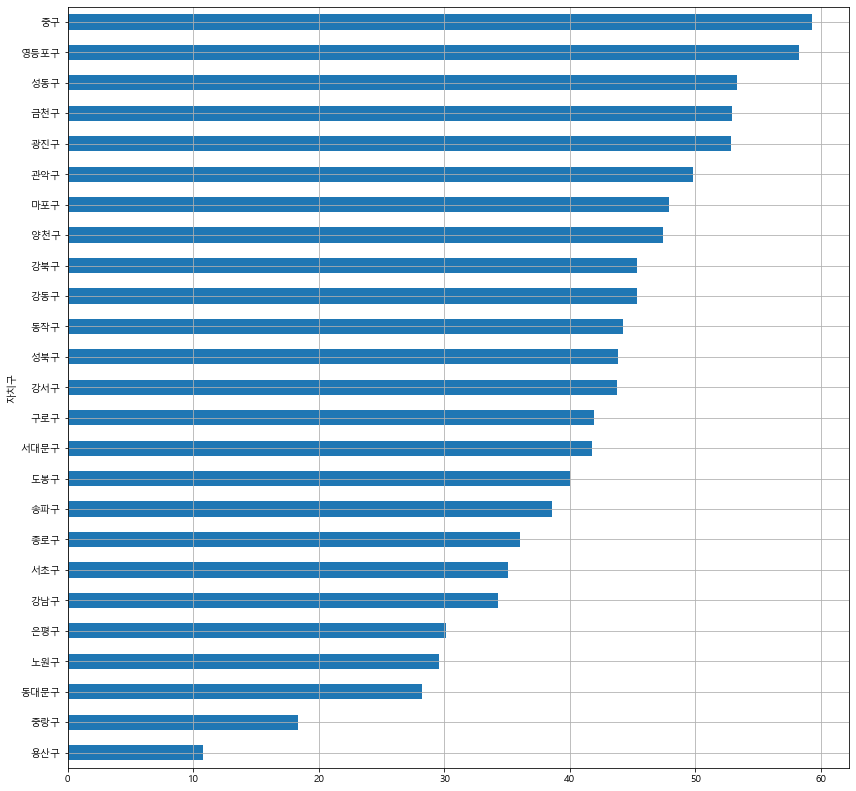

In [26]:
df['최근 증가율'].sort_values().plot(kind='barh',grid=True, figsize=(14,14))

plt.show()

### - 인구수와 CCTV 댓수의 산점도

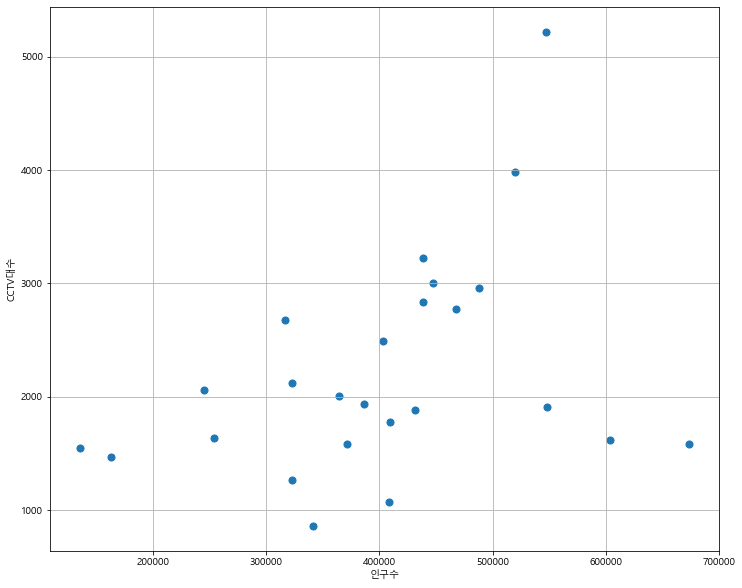

In [28]:
plt.figure(figsize=(12,10))
plt.scatter(df['인구수'],df['소계'], s=50)

plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.grid()
plt.show()

### -인구수와 CCTV 댓수의 산점도 및 회귀선

In [30]:
fp1 = np.polyfit(df['인구수'],df['소계'], 1)
fp1

array([2.85240371e-03, 1.07309855e+03])

In [35]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 101)

No handles with labels found to put in legend.


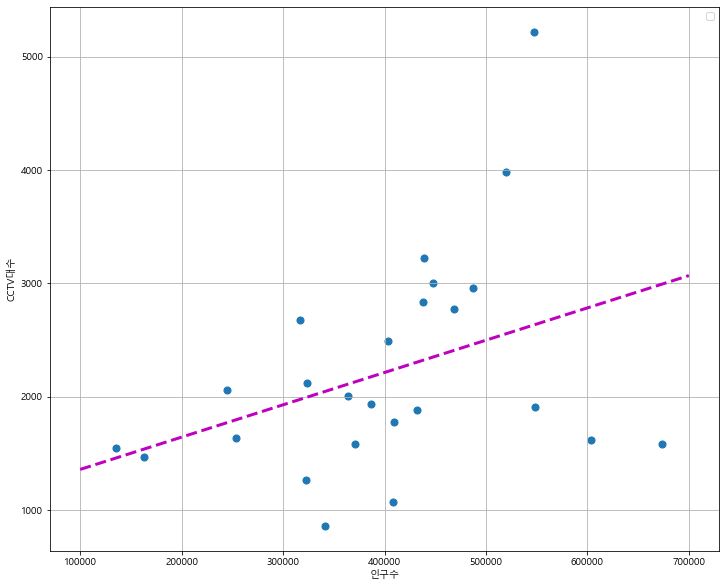

In [40]:
plt.figure(figsize=(12,10))
plt.scatter(df['인구수'],df['소계'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='m')
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.legend()
plt.grid()
plt.show()

### -인구수와 CCTV 댓수의 산점도, 회귀선 및 자치구명 

In [66]:
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
자치구,,,,,,,,
강남구,5221,34.284620,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,45.343268,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,45.375494,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,43.784787,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,49.786700,520040,501957,18083,72249,3.477233,13.892970


In [77]:
df['인당 CCTV'] = df['소계']/df['인구수']*100
df

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차,인당 CCTV
자치구,,,,,,,,,,
강남구,5221,34.284620,547453,542364,5089,67085,0.929578,12.254020,2586.344483,0.953689
강동구,1879,45.343268,431920,427573,4347,58770,1.006436,13.606686,426.108759,0.435034
강북구,1265,45.375494,322915,319164,3751,58196,1.161606,18.022080,729.182492,0.391744
강서구,1617,43.784787,603611,596949,6662,79660,1.103691,13.197241,1177.840805,0.267888
관악구,3985,49.786700,520040,501957,18083,72249,3.477233,13.892970,1428.537426,0.766287
광진구,1581,52.814674,371063,355559,15504,45619,4.178266,12.294139,550.520026,0.426073
구로구,3227,41.896498,438486,404497,33989,61801,7.751445,14.094179,903.162358,0.735941
금천구,1634,52.937576,254021,233917,20104,35739,7.914306,14.069309,163.668991,0.643254
노원구,1906,29.590766,548160,543752,4408,77096,0.804145,14.064507,730.672166,0.347709


In [78]:
df['오차'] = np.abs(df['소계']-f1(df['인구수']))
df.head()

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차,인당 CCTV
자치구,,,,,,,,,,
강남구,5221,34.284620,547453,542364,5089,67085,0.929578,12.254020,2586.344483,0.953689
강동구,1879,45.343268,431920,427573,4347,58770,1.006436,13.606686,426.108759,0.435034
강북구,1265,45.375494,322915,319164,3751,58196,1.161606,18.022080,729.182492,0.391744
강서구,1617,43.784787,603611,596949,6662,79660,1.103691,13.197241,1177.840805,0.267888
관악구,3985,49.786700,520040,501957,18083,72249,3.477233,13.892970,1428.537426,0.766287


In [79]:
df_sort = df.sort_values(by='오차',ascending=False)
df_sort.head(10)

,소계,최근 증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,오차,인당 CCTV
자치구,,,,,,,,,,
강남구,5221,34.284620,547453,542364,5089,67085,0.929578,12.254020,2586.344483,0.953689
관악구,3985,49.786700,520040,501957,18083,72249,3.477233,13.892970,1428.537426,0.766287
송파구,1586,38.587642,673507,666635,6872,81364,1.020331,12.080647,1408.212414,0.235484
도봉구,858,39.976690,341649,339413,2236,55964,0.654473,16.380554,1189.619423,0.251135
강서구,1617,43.784787,603611,596949,6662,79660,1.103691,13.197241,1177.840805,0.267888
중랑구,1068,18.352060,408147,403209,4938,61830,1.209858,15.148954,1169.298565,0.261670
구로구,3227,41.896498,438486,404497,33989,61801,7.751445,14.094179,903.162358,0.735941
노원구,1906,29.590766,548160,543752,4408,77096,0.804145,14.064507,730.672166,0.347709
강북구,1265,45.375494,322915,319164,3751,58196,1.161606,18.022080,729.182492,0.391744


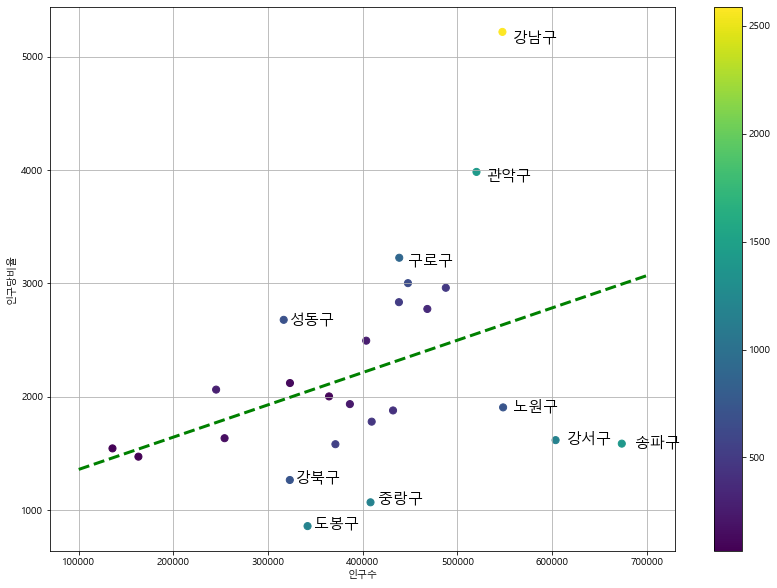

In [80]:
plt.figure(figsize=(14,10))
plt.scatter(df['인구수'], df['소계'], c=df['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):                                                      
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,                    # 그래프 안에 문자 삽입
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

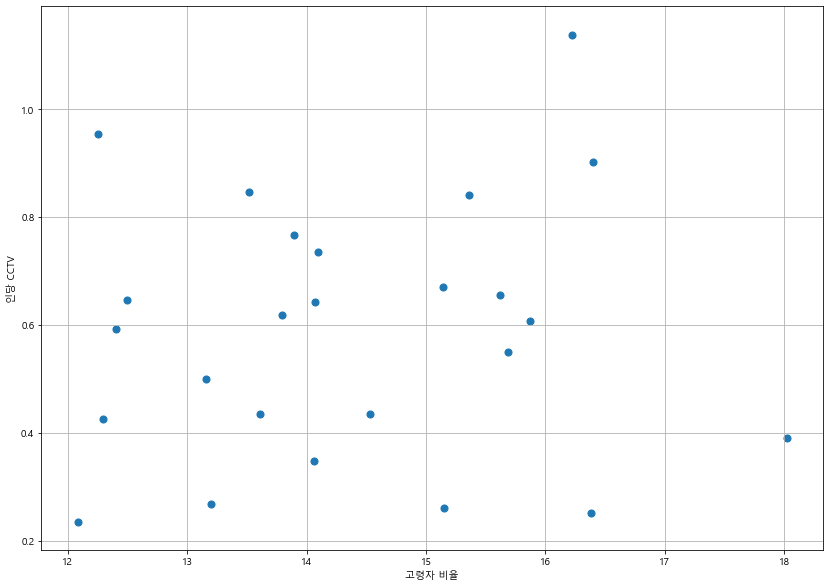

In [114]:
plt.figure(figsize=(14,10))
plt.scatter(df['고령자 비율'], df['인당 CCTV'], s=50)
    
plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')

plt.grid()
plt.show()

In [115]:
fp1 = np.polyfit(df['고령자 비율'],df['인당 CCTV'], 1)
fp1

array([0.01530512, 0.36894872])

In [116]:
f1 = np.poly1d(fp1)
fx = np.linspace(10, 20, 10)

No handles with labels found to put in legend.


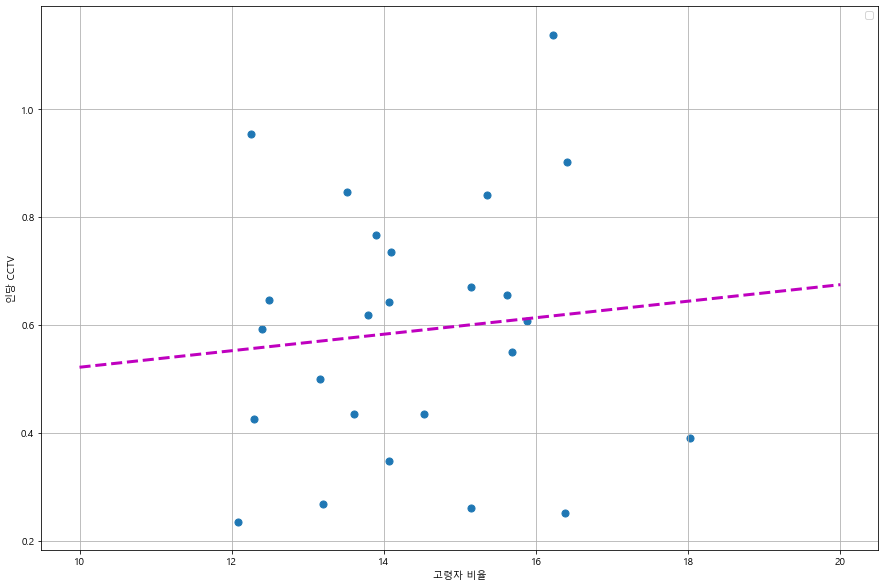

In [117]:
plt.figure(figsize=(15,10))
plt.scatter(df['고령자 비율'],df['인당 CCTV'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='m')
plt.xlabel('고령자 비율')
plt.ylabel('인당 CCTV')
plt.legend()
plt.grid()
plt.show()

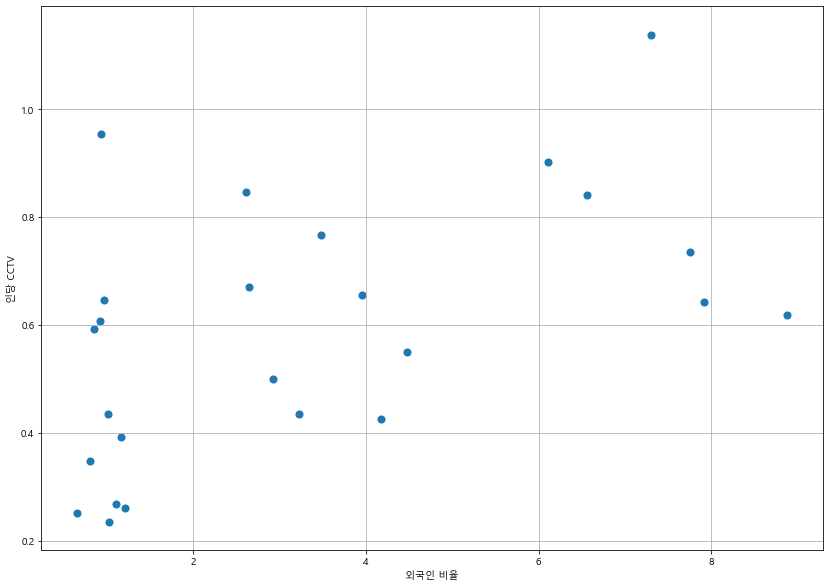

In [82]:
plt.figure(figsize=(14,10))
plt.scatter(df['외국인 비율'], df['인당 CCTV'], s=50)
    
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')

plt.grid()
plt.show()

In [107]:
fp1 = np.polyfit(df['외국인 비율'],df['인당 CCTV'], 1)
fp1

array([0.04736476, 0.43242755])

In [108]:
f1 = np.poly1d(fp1)
fx = np.linspace(1, 10, 10)

No handles with labels found to put in legend.


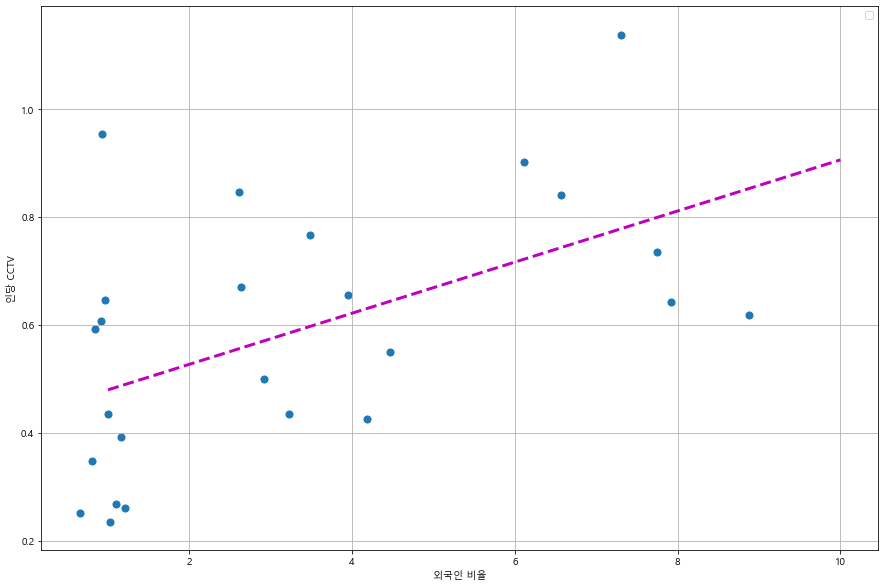

In [109]:
plt.figure(figsize=(15,10))
plt.scatter(df['외국인 비율'],df['인당 CCTV'], s=50)
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='m')
plt.xlabel('외국인 비율')
plt.ylabel('인당 CCTV')
plt.legend()
plt.grid()
plt.show()